# **Home task : KNN classification**

### 1. **Iris dataset**
  * load iris dataset
  * split to train and test
  * train KNN classifiers for different K
  * choose the best K determined on test set

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
np.random.seed = 2021
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris


data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [25]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

# Train KNN classifiers for different values of K and determine the best K
best_k = None
best_score = 0

for k in range(1, 21):  # Testing K values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        best_k = k

print('The best k = {}, score = {:.4f}'.format(best_k, best_score))

The best k = 8, score = 1.0000


### 2. **Synthetic dataset**
  * generrate synthetic dataset
  * split to train and test
  * train KNN regressors for different K
  * choose the best K determined on test set
  * visualize the decision boundary

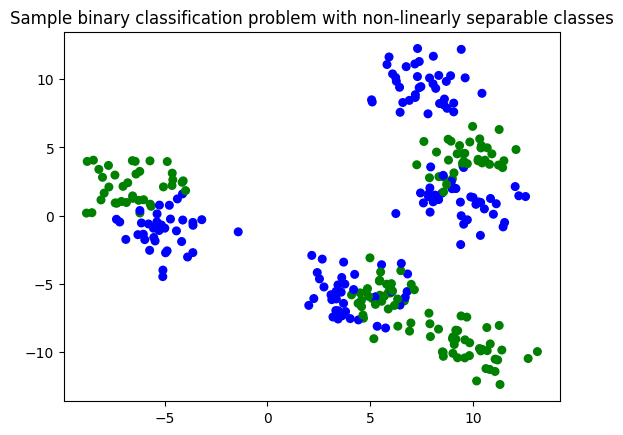

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

np.random.seed = 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2


cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

plt.ion()  # Enable interactive mode
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,marker= 'o', s=30, cmap=cmap_bold)
plt.show(block=True)


The best k = 3, score = 0.0667


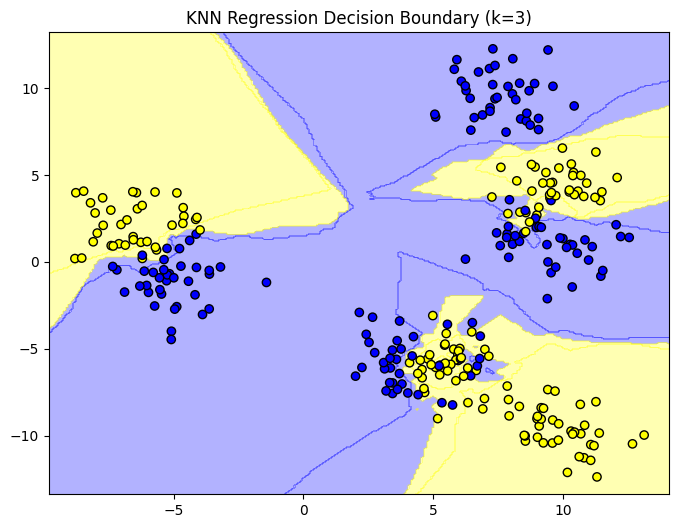

In [27]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=2021)

# Train KNN regressors for different K values and determine the best K
best_k = None
best_score = float('inf')  

for k in range(1, 21):  # Testing K values from 1 to 20
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    
    if score < best_score:
        best_score = score
        best_k = k

print('The best k = {}, score = {:.4f}'.format(best_k, best_score))

# Visualize decision boundary
def plot_decision_boundary(X, y, model, title):
    cmap_bold = ListedColormap(['blue', '#FFFF00'])
    h = .1  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_bold)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.show()

# Train model with best K and visualize decision boundary
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
plot_decision_boundary(X_D2, y_D2, best_knn, f'KNN Regression Decision Boundary (k={best_k})')
